In [3]:
import pandas as pd
file_path = "./인천교통공사_2호선 일별 승하차 현황_2024-07-26.csv"
df = pd.read_csv(file_path,encoding="EUC-KR")
df.head()

,역명,일자,이용인원,승차인원,하차인원
0,검단오류(검단산업단지),2023-06-01,5939,2924,3015
1,왕길,2023-06-01,5337,2680,2657
2,검단사거리,2023-06-01,17334,9047,8287
3,마전,2023-06-01,9345,4552,4793
4,완정,2023-06-01,16736,8660,8076


In [4]:
columns = ['name','date','total','get in','get off']
df.columns = columns
df = df.loc[:,:'get off']

In [5]:
df.tail()

,name,date,total,get in,get off
10687,모래내시장,2024-06-30,9667,4791,4876
10688,만수,2024-06-30,5461,2814,2647
10689,남동구청,2024-06-30,4079,2108,1971
10690,인천대공원,2024-06-30,4083,2039,2044
10691,운연(서창),2024-06-30,1216,648,568


In [6]:
data = df.groupby(['name', 'date', 'total']).sum().reset_index()
data = data[data['date'] == '2023-06-01']
data

,name,date,total,get in,get off
0,가재울,2023-06-01,7512,3802,3710
396,가정(루원시티),2023-06-01,23803,12223,11580
792,가정중앙시장,2023-06-01,11853,5673,6180
1188,검단사거리,2023-06-01,17334,9047,8287
1584,검단오류(검단산업단지),2023-06-01,5939,2924,3015
1980,검바위,2023-06-01,7803,3745,4058
2376,검암,2023-06-01,5948,3191,2757
2772,남동구청,2023-06-01,9088,4731,4357
3168,독정,2023-06-01,8338,4125,4213
3564,마전,2023-06-01,9345,4552,4793


In [7]:
gdata = data[['name','date','total']]
gdata = gdata.sort_values(by=['name','date'],ascending=[True,True])
gdata.head(10)

,name,date,total
0,가재울,2023-06-01,7512
396,가정(루원시티),2023-06-01,23803
792,가정중앙시장,2023-06-01,11853
1188,검단사거리,2023-06-01,17334
1584,검단오류(검단산업단지),2023-06-01,5939
1980,검바위,2023-06-01,7803
2376,검암,2023-06-01,5948
2772,남동구청,2023-06-01,9088
3168,독정,2023-06-01,8338
3564,마전,2023-06-01,9345


In [8]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,가재울,7512
1,가정(루원시티),23803
2,가정중앙시장,11853
3,검단사거리,17334
4,검단오류(검단산업단지),5939
5,검바위,7803
6,검암,5948
7,남동구청,9088
8,독정,8338
9,마전,9345


In [9]:
sdata = tdata.sort_values(by='total',ascending=False)
sdata.head(20)
total_data = sdata[:20]
total_data

,name,total
1,가정(루원시티),23803
17,시민공원(문화창작지대),19127
3,검단사거리,17334
12,서구청,17285
25,주안,17033
19,완정,16736
11,모래내시장,16104
2,가정중앙시장,11853
10,만수,10388
18,아시아드경기장(공촌사거리),9792


In [10]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "./D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

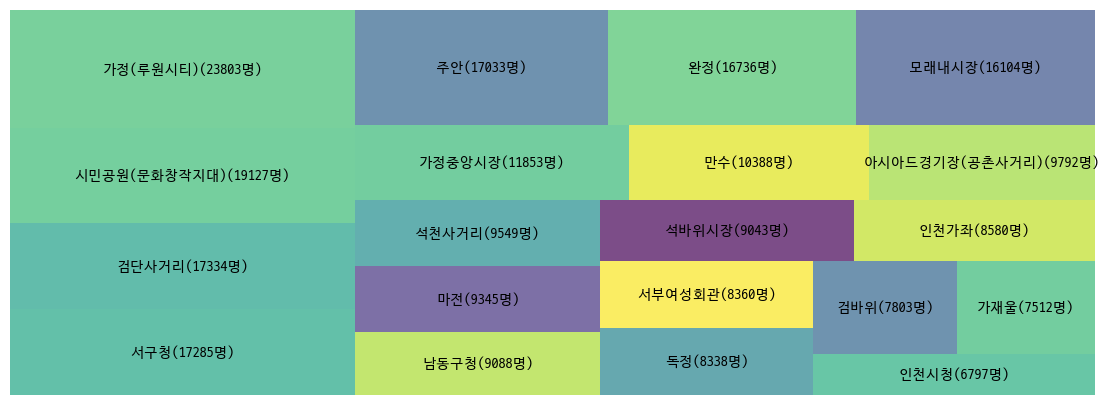

In [11]:
import squarify
plt.figure(figsize=(14,5))
squarify.plot(sizes=total_data['total'], label= [f"{x[0]}({x[1]}명)" for x in zip (total_data['name'], total_data['total'])], alpha=0.7)
plt.rcParams['font.size']= 10
plt.rcParams['text.color']='black'
plt.gca().invert_yaxis()
plt.axis("off")
plt.show()